In [1]:
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
import PIL
import cv2
from keras.constraints import maxnorm
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator


In [2]:
dataset_url = "https://drive.google.com/drive/u/0/folders/1yE7LoZaO694KJEyw0k_4BrBAzYWzUd_E"
data_dir = tf.keras.utils.get_file('Galaxy_Dataset', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'./datasets/Galaxy_Dataset'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/Galaxy_Dataset')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/Galaxy_Dataset/Lenticular Galaxy/220px-NGC311_-_SDSS_DR14.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Lenticular Galaxy/lossy-page1-220px-Potw1328a.tif.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Lenticular Galaxy/220px-NGC270_-_SDSS_DR14.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Lenticular Galaxy/120px-Busy_bees.jpg'),
 PosixPath('datasets/Galaxy_Dataset/Lenticular Galaxy/220px-NGC273_-_SDSS_DR14.jpg')]

In [6]:
image_count =  len(list(data_dir.glob('*/*.png')))
print(image_count)

109


In [7]:
spiral =  list(data_dir.glob('Spiral Galaxy/*'))
elliptical = list(data_dir.glob('Elliptical Galaxy/*'))
spiral[:5]

[PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1102.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC5614.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC2735.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1368.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC4394.png')]

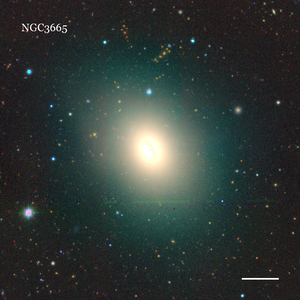

In [8]:

PIL.Image.open(str(elliptical[1]))

In [9]:
Galaxy_images_dict= {
    'disk': list(data_dir.glob('Disk Galaxy/*')),
    'elliptical': list(data_dir.glob('Elliptical Galaxy/*')),
    'irregular': list(data_dir.glob('Irregular Galaxy/*')),
    'lenticular': list(data_dir.glob('Lenticular Galaxy/*')),
    'spiral':list(data_dir.glob('Spiral Galaxy/*')),
}

In [10]:
Galaxy_labels_dict = {
    'disk':0,
    'elliptical': 1,
    'irregular': 2,
    'lenticular': 3,
    'spiral': 4,
}

In [11]:
Galaxy_images_dict['spiral'][:5]


[PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1102.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC5614.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC2735.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-IC1368.png'),
 PosixPath('datasets/Galaxy_Dataset/Spiral Galaxy/thumb-NGC4394.png')]

In [12]:
img =  cv2.imread(str(Galaxy_images_dict['disk'][0]))

In [13]:
img.shape

(300, 300, 3)

In [14]:
X, y = [],[]

for Galaxy_name, images in Galaxy_images_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img =  cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(Galaxy_labels_dict[Galaxy_name])

In [34]:
X =  np.array(X)
y = np.array(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [42]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [44]:
num_classes = 5

model = Sequential([
    layers.Conv2D(40,(3,3), padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(40,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(40,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),  
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)    
])





In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=10, restore_best_weights=False)
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 599ms/step - loss: 1.5899 - accuracy: 0.2258
Epoch 2/30
3/3 [==============================] - 2s 575ms/step - loss: 1.4430 - accuracy: 0.3763
Epoch 3/30
3/3 [==============================] - 2s 580ms/step - loss: 1.1912 - accuracy: 0.5376
Epoch 4/30
3/3 [==============================] - 2s 582ms/step - loss: 0.8578 - accuracy: 0.6774
Epoch 5/30
3/3 [==============================] - 2s 580ms/step - loss: 0.5865 - accuracy: 0.7849
Epoch 6/30
3/3 [==============================] - 2s 585ms/step - loss: 0.6120 - accuracy: 0.7849
Epoch 7/30
3/3 [==============================] - 2s 579ms/step - loss: 0.5400 - accuracy: 0.7849
Epoch 8/30
3/3 [==============================] - 2s 578ms/step - loss: 0.3648 - accuracy: 0.8925
Epoch 9/30
3/3 [==============================] - 2s 751ms/step - loss: 0.2771 - accuracy: 0.9140
Epoch 10/30
3/3 [==============================] - 3s 830ms/step - loss: 0.2026 - accuracy: 0.9247
Epoch 11/30
3/3 [==

In [46]:
model.evaluate(X_test_scaled,y_test)
model.summary()

1/1 [==============================] - 0s 236ms/step - loss: 0.8421 - accuracy: 0.7500
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 180, 180, 40)      1120      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 40)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 40)        14440     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 45, 45, 40)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 40)        14440     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 22, 22, 40)        0         
_________________________________

In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [48]:
y_predict =  model.predict(X_test_scaled)
y_predict_classes = [np.argmax(element) for element in y_predict]
#y_predict_classes[0]
#plt.matshow(X_test_scaled[0])

In [49]:
print("Classification Report: \n", classification_report(y_test, y_predict_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.00      0.00      0.00         4
           2       0.80      1.00      0.89         4
           3       0.71      0.71      0.71         7
           4       0.71      0.83      0.77         6

    accuracy                           0.75        32
   macro avg       0.60      0.69      0.64        32
weighted avg       0.65      0.75      0.70        32



/home/bifrost/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bifrost/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bifrost/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_classes)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[11,  0,  2,  0,  0],
       [ 1,  0,  1,  1,  1],
       [ 3,  1,  4,  0,  0],
       [ 1,  0,  0,  5,  3],
       [ 0,  0,  0,  1,  7]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

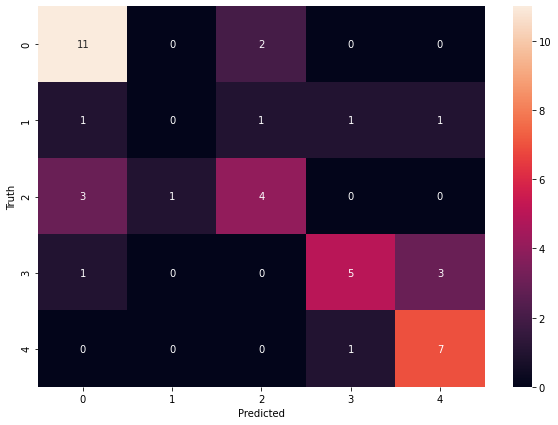

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')